# 목표 :
###  Class와 def 으로 모듈화된 기계학습 프로세스를 학습 과정까지 구현해본다.
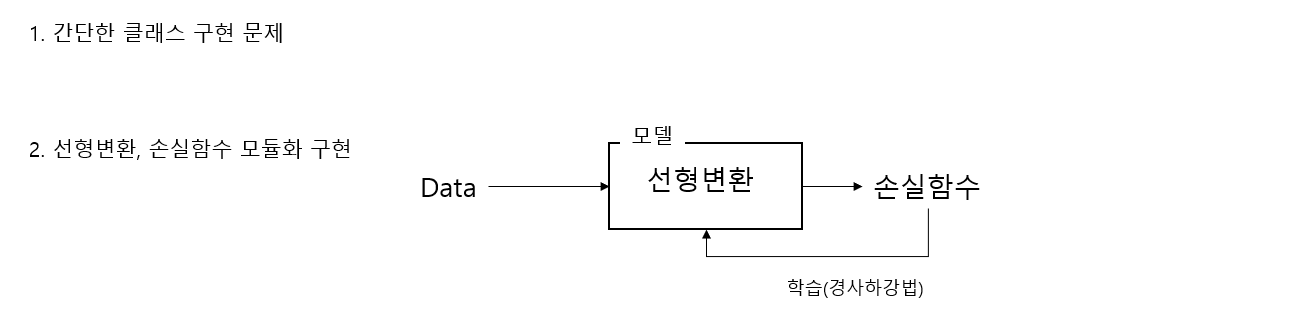

### 1번 문제: 다음과 같은 기능으로 작동하는 Counter 클래스를 작성해보세요
- 기능 요구 사항 :
    1. Counter 클래스의 객체를 선언하면 자동으로 count 라는 변수는 0으로 초기화
    2. increment(): count를 1 증가
    3. reset(): count를 0으로 초기화
    4. get(): count 반환

In [1]:
class Counter:
    def __init__(self):
        self.count = 0
    def increment(self):
        self.count += 1
    def reset(self):
        self.count = 0
    def get(self):
        return self.count

# 
### 2번 문제 : 이제 아래와 같은 간단한 기계학습 프로세스를 클래스로 구현해볼 것임
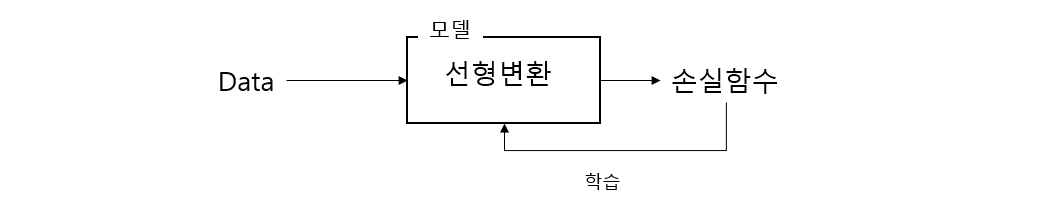

# 
#### 2-1번 문제 : 다음 기능을 만족하는 LinearModel 클래스를 구현하세요
- 기능 요구 사항 :
    1. LinearModel 객체를 선언할 때 __init__()에서 다음과 같이 직접 내부에서 초기화되어야함.
        - 가중치 w는 정규분포에서 샘플링된 값으로 초기화
        - 절편 b는 0으로 초기화
    2. forward 함수는 wx + b 값을 반환
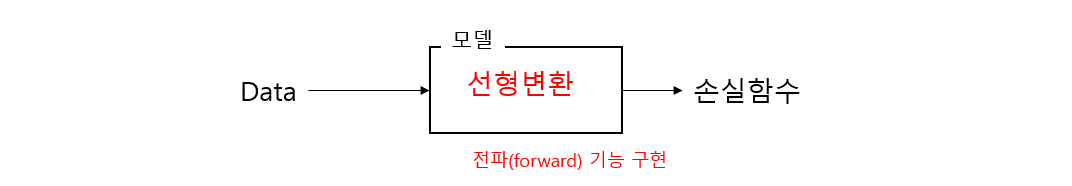
- 클래스 구현 후 입력 데이터 x = 2 로 선형변환 forward 결과를 출력해보세요

In [2]:
class LinearModel:
    def __init__(self, w, b):
        self.w = w  # w 값을 저장
        self.b = b  # b 값을 저장

    def forward(self, x):
        self.x = x
        return self.w*self.x + self.b  # wx + b 계산 결과 반환

In [3]:
a = LinearModel(2, 0)
a.forward(2)

4

# 
#### 2-2번 문제 : 앞서 설계한 LinearModel 기반으로 backward 함수 기능을 추가하세요
- 기능 요구 사항 :
    1. backwrad의 매개변수 dout은 Chain rule에 의해 이전에 계산된 값이 전달되어받아질 것임(코드를 실행할 때는 dout=1로 입력 받으세요)
    2. dx 는 forward 에서 wx + b 에 대해 x로 미분한 값
    3. dw 는 forward 에서 wx + b 에 대해 w로 미분한 값
    4. db 는 forward 에서 wx + b 에 대해 b로 미분한 값
    5. return은 dx, dw, db 를 반환
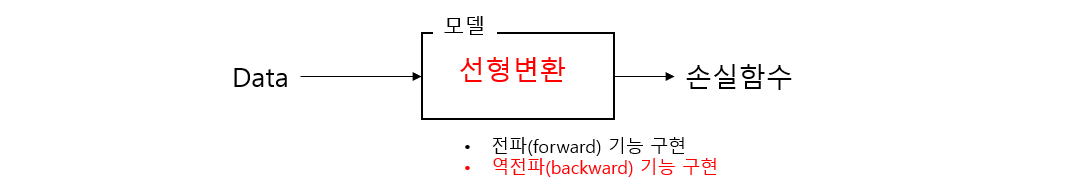
- 클래스 구현 후 입력 데이터 x=2 와 역전파로 전달되는 값 dout=1로 forward와 backward 값을 출력해보세요

In [14]:
class LinearModel:
    def __init__(self, w, b):
        self.w = w  # w 값을 저장
        self.b = b  # b 값을 저장

    def forward(self, x):
        self.x = x
        return self.w*self.x + self.b  # wx + b 계산 결과 반환

    def backward(self, dout=1):
        dx = self.forward(self.x)**2/self.x * dout  
        dw = self.forward(self.x)/self.w * dout
        db = (self.w*self.x) * dout
        return dx, dw, db


In [15]:
import random
a = LinearModel(random.gauss(0, 1), 0)
print(a.forward(2))
print(a.backward())

0.9962615620082453
(0.49626854996755443, 2.0, 0.9962615620082453)


# 
#### 2-3번 문제 : MeanSquaredError class 구현
- 기능 요구 사항 :
    1. $ L=\frac{1}{2} (y-t)^2%$
    2. forward 함수는 1번과 같이 계산
    3. backward 함수는 $\frac{\partial{L}}{\partial{y}}$ 을 계산
    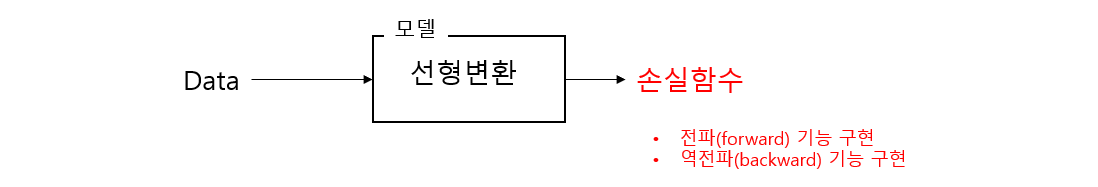
- 클래스 구현 후 입력 x=2, 정답 t=1 로 앞서 구현된 LinearModel의 전파를 통해 예측된 y 값과의 MSE 손실함수 값을 출력해보세요(forward, backward 값 모두)

In [17]:
class MeanSquaredError:
    def __init__(self, y, t):
        self.y = y
        self.t = t

    def forward(self):
        return 0.5*(self.y-self.t)**2  # 0.5 * (y - t) ** 2 계산 결과 반환

    def backward(self):
        return self.y - self.t  # y - t 반환

In [19]:
a = MeanSquaredError(2, 1)
print(a.forward())
print(a.backward())

0.5
1


# 
#### 2-4번 문제 : 위에서 구현한 LinearModel 과 MeanSquaredError 를 통해 전체적인 forward 과정과 backwrad 과정을 출력해보세요
1. 입력 데이터 x = 2
2. 정답 데이터 t = 1
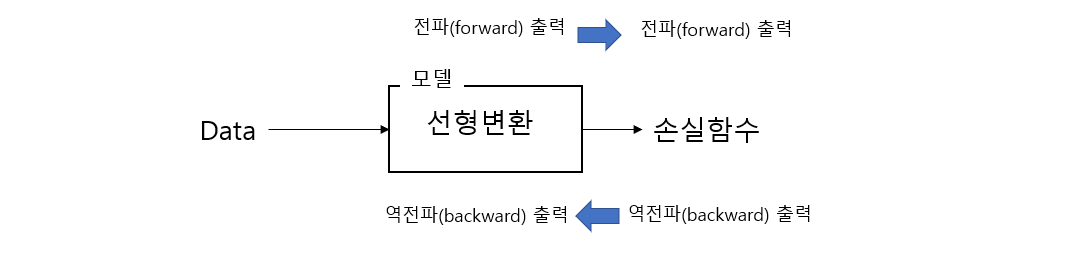

In [ ]:
x = 2
t = 1

In [21]:
import random
a = LinearModel(random.gauss(0, 1), 0)
print(a.forward(2))
print(a.backward())
b = MeanSquaredError(2, 1)
print(b.forward())
print(b.backward())

-0.20473481094305293
(0.020958171405943814, 2.0, -0.20473481094305293)
0.5
1


# 
#### 2-5번 문제 : 위에서 구해진 파타미터의 미분 값을 가지고 파라미터를 업데이트한 후 전후 손실함수 값을 비교해보세요(학습률 lr = 0.01)
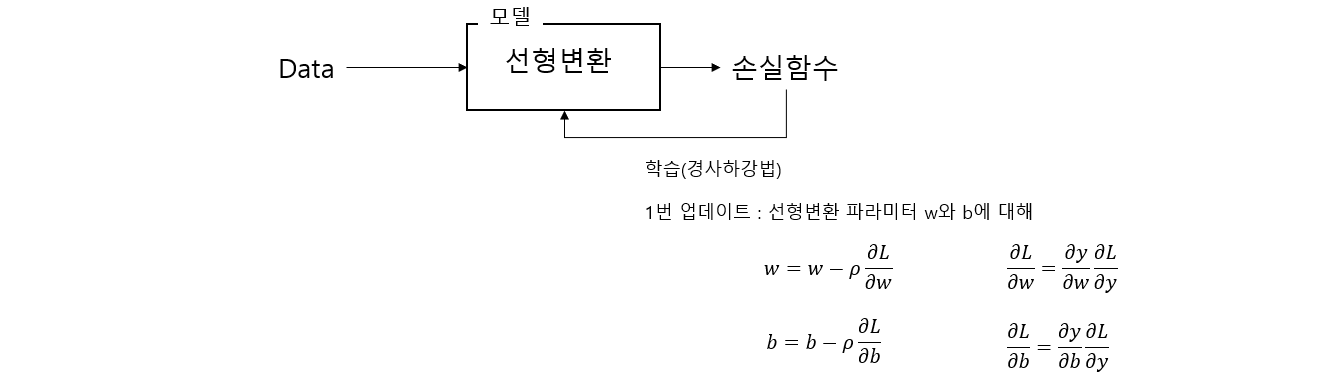

In [ ]:
lr = 0.01

In [26]:
class LinearModel_1:
    def __init__(self, w, b):
        self.w = w  # w 값을 저장
        self.b = b  # b 값을 저장

    def forward(self, x):
        self.x = x
        return self.w*self.x + self.b  # wx + b 계산 결과 반환

    def backward(self, dout=1):
        self.dx = self.forward(self.x)**2/self.x * dout  
        self.dw = self.forward(self.x)/self.w * dout
        self.db = (self.w*self.x) * dout
        return self.dx, self.dw, self.db
    
    def update(self, lr):
        self.w -= lr * self.dw
        self.b -= lr * self.db
        return self.w, self.b

In [27]:
import random
a = LinearModel_1(random.gauss(0, 1), 0)
print(a.forward(2))
print(a.backward()) 
print(a.update(0.01))

-3.5371131666418676
(6.25558477681563, 2.0, -3.5371131666418676)
(-1.7885565833209338, 0.03537113166641868)


# 
#### 2-6번 문제 : 이제 위 전체 과정을 100번의 경사하강법을 수행해보세요.
1. 입력 x = 2, 정답 t = 1, 학습률=0.01
2. 매 iteration 마다 예측값과, 정답값, 그리고 손실함수 값 출력
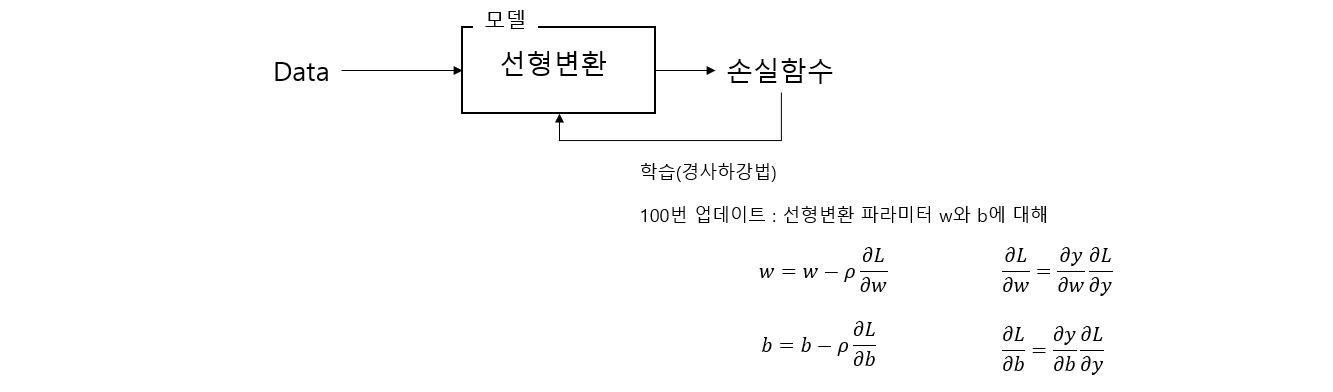

In [ ]:
x = 2
t = 1
lr = 0.01

In [ ]:
class a:
    def __init__(self, w, t, b, x, lr):
        self.w = w
        self.t = t
        self.b = b
        self.lr = lr
        self.x = x 
    
    def forward(self):
        return self.w*self.x + self.b
    
    def loss(self):
        return (self.forward() - self.t) **2
    
    def differential(self):
        self.dL_dy = 2*(self.forward()-self.t)
        self.dy_dw = self.dL_dy *self.x
        self.dL_db = self.dL_dy *1
        return self.dL_dy, self.dy_dw, self.dL_db
    
    def update(self):
        self.w = self.w - self.lr * self.dy_dw
        self.b = self.b - self.lr * self.dL_db

    def Predicted_value(self):
        a = self.forward()
        b = self.loss()
        print(f'y={a:.4f}, loss={b:.4f}, w={self.w:.4f}, b={self.b:.4f}')

In [ ]:
p = a(random.gauss(0, 1), 1, 0, 2, 0.01) 
for i in range(100):
    p.forward()
    p.differential()
    p.update()
    p.Predicted_value()  # 예측값 출력

y=0.3736, loss=0.3924, w=0.1798, b=0.0139
y=0.4362, loss=0.3179, w=0.2049, b=0.0264
y=0.4926, loss=0.2575, w=0.2274, b=0.0377
y=0.5433, loss=0.2086, w=0.2477, b=0.0479
y=0.5890, loss=0.1689, w=0.2660, b=0.0570
y=0.6301, loss=0.1368, w=0.2824, b=0.0652
y=0.6671, loss=0.1108, w=0.2972, b=0.0726
y=0.7004, loss=0.0898, w=0.3105, b=0.0793
y=0.7303, loss=0.0727, w=0.3225, b=0.0853
y=0.7573, loss=0.0589, w=0.3333, b=0.0907
y=0.7816, loss=0.0477, w=0.3430, b=0.0955
y=0.8034, loss=0.0386, w=0.3518, b=0.0999
y=0.8231, loss=0.0313, w=0.3596, b=0.1038
y=0.8408, loss=0.0254, w=0.3667, b=0.1074
y=0.8567, loss=0.0205, w=0.3731, b=0.1105
y=0.8710, loss=0.0166, w=0.3788, b=0.1134
y=0.8839, loss=0.0135, w=0.3840, b=0.1160
y=0.8955, loss=0.0109, w=0.3886, b=0.1183
y=0.9060, loss=0.0088, w=0.3928, b=0.1204
y=0.9154, loss=0.0072, w=0.3965, b=0.1223
y=0.9238, loss=0.0058, w=0.3999, b=0.1240
y=0.9315, loss=0.0047, w=0.4030, b=0.1255
y=0.9383, loss=0.0038, w=0.4057, b=0.1269
y=0.9445, loss=0.0031, w=0.4082, b